In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
data = pd.read_csv('MDS_UPDRS_Part_II__Patient_Questionnaire.csv')
data

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,...,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,232529901,S,3401,BL,NUPDRS2P,07/2010,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,07/2010,2020-06-29 14:40:25.0,NaN,07/2010
1,232713901,S,3406,SC,NUPDRS2P,07/2010,1,0,2.0,0.0,...,2.0,0.0,3.0,0.0,0.0,0.0,07/2010,2020-06-29 14:42:11.0,NaN,07/2010
2,231800401,S,3402,SC,NUPDRS2P,07/2010,1,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,07/2010,2020-06-29 14:49:46.0,NaN,07/2010
3,232595801,S,3400,SC,NUPDRS2P,07/2010,1,0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,07/2010,2020-06-29 14:40:02.0,NaN,07/2010
4,230957201,S,3403,SC,NUPDRS2P,07/2010,1,0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,07/2010,2020-06-29 14:40:45.0,NaN,07/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,770490701,S,55395,V08,NUPDRS2P,03/2020,1,0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,0.0,04/2020,2020-06-30 17:25:22.0,NaN,04/2020
13904,711403201,S,3910,V11,NUPDRS2P,11/2017,1,0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,10/2018,2020-06-26 18:43:34.0,NaN,04/2020
13905,771897401,S,60045,V13,NUPDRS2P,03/2020,1,0,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,06/2020,2020-06-30 16:55:43.0,NaN,06/2020
13906,772103301,S,56789,V08,NUPDRS2P,03/2020,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,06/2020,2020-06-30 16:13:07.0,NaN,06/2020


In [3]:
data.columns

Index(['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT',
       'NUPSOURC', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES',
       'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE',
       'NP2WALK', 'NP2FREZ', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY',
       'SITE_APRV'],
      dtype='object')

In [4]:
del data['REC_ID'], data['F_STATUS'],data['EVENT_ID'],data['PAG_NAME'], data['INFODT']
del data['ORIG_ENTRY'], data['LAST_UPDATE'], data['QUERY'], data['SITE_APRV']
data

,PATNO,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ
0,3401,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3406,1,0,2.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0
2,3402,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3400,1,0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,3403,1,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,55395,1,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0
13904,3910,1,0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0
13905,60045,1,0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
13906,56789,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data['PATNO'].value_counts()

3552     18
3207     18
3050     18
3407     18
3052     18
         ..
42257     1
60119     1
60103     1
90822     1
50701     1
Name: PATNO, Length: 2136, dtype: int64

In [7]:
data.describe()

,PATNO,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ
count,13908.000000,13908.000000,13908.000000,13907.000000,13907.000000,13905.000000,13905.000000,13901.000000,13902.000000,13900.000000,13904.000000,13905.000000,13905.000000,13905.000000,13905.000000
mean,24390.467573,1.106054,0.475122,0.564392,0.199108,0.341604,0.457893,0.272930,0.765286,0.504676,0.391974,0.754333,0.540741,0.510536,0.156203
std,25007.280971,0.444243,0.798377,0.968105,0.512722,0.614095,0.697047,0.527414,0.999861,0.823284,0.644986,0.817705,0.753357,0.773589,0.510303
min,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3462.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4055.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,50157.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,92834.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [9]:
data = data.dropna(how='any')
data.describe()

,PATNO,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ
count,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000,13894.000000
mean,24397.174608,1.106017,0.475097,0.563912,0.198791,0.341586,0.457752,0.272708,0.765222,0.504894,0.391824,0.754282,0.540737,0.510436,0.156039
std,25011.613879,0.444164,0.798260,0.967579,0.512209,0.614072,0.696863,0.526947,0.999754,0.823395,0.644837,0.817779,0.753334,0.773489,0.510151
min,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3462.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4054.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,50157.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,92834.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [10]:
data['PATNO'].value_counts()

3552     18
3207     18
3050     18
3407     18
3052     18
         ..
56033     1
42265     1
60119     1
60103     1
50701     1
Name: PATNO, Length: 2136, dtype: int64

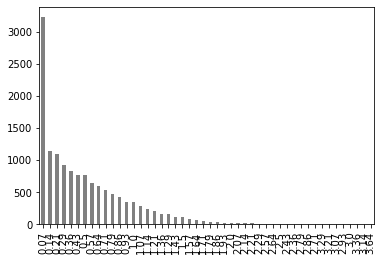

In [12]:
mean_data = data.drop(['PATNO'],axis=1)
df1 = mean_data.mean(axis=1)
df1 = round(df1,2)
df1.value_counts().plot(kind='bar',color='gray')